In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel

In [2]:
Breast_cancer=pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\breast cancer.csv')

In [3]:
Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
Breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
Breast_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
Breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
Breast_cancer.shape

(569, 33)

In [8]:
Breast_cancer=Breast_cancer.drop(['id','Unnamed: 32'],axis=1)

In [9]:
Breast_cancer.shape

(569, 31)

In [10]:
Breast_cancer.duplicated().sum()

0

# Unique values for each column

In [11]:
# Iterate over all columns in the dataframe
for col in Breast_cancer.columns:
    print(f"Unique values in column '{col}': ,values:\n, {Breast_cancer[col].unique()}")

Unique values in column 'diagnosis': ,values:
, ['M' 'B']
Unique values in column 'radius_mean': ,values:
, [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  

In [12]:
for col in Breast_cancer:
    print(col,'\n===========')
    print(Breast_cancer[col].value_counts(),'\n')

diagnosis 
B    357
M    212
Name: diagnosis, dtype: int64 

radius_mean 
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64 

texture_mean 
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64 

perimeter_mean 
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64 

area_mean 
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: area_mean, Length: 539, dtype: int64 

smoothness_mean 
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: smoothness_mean, Length

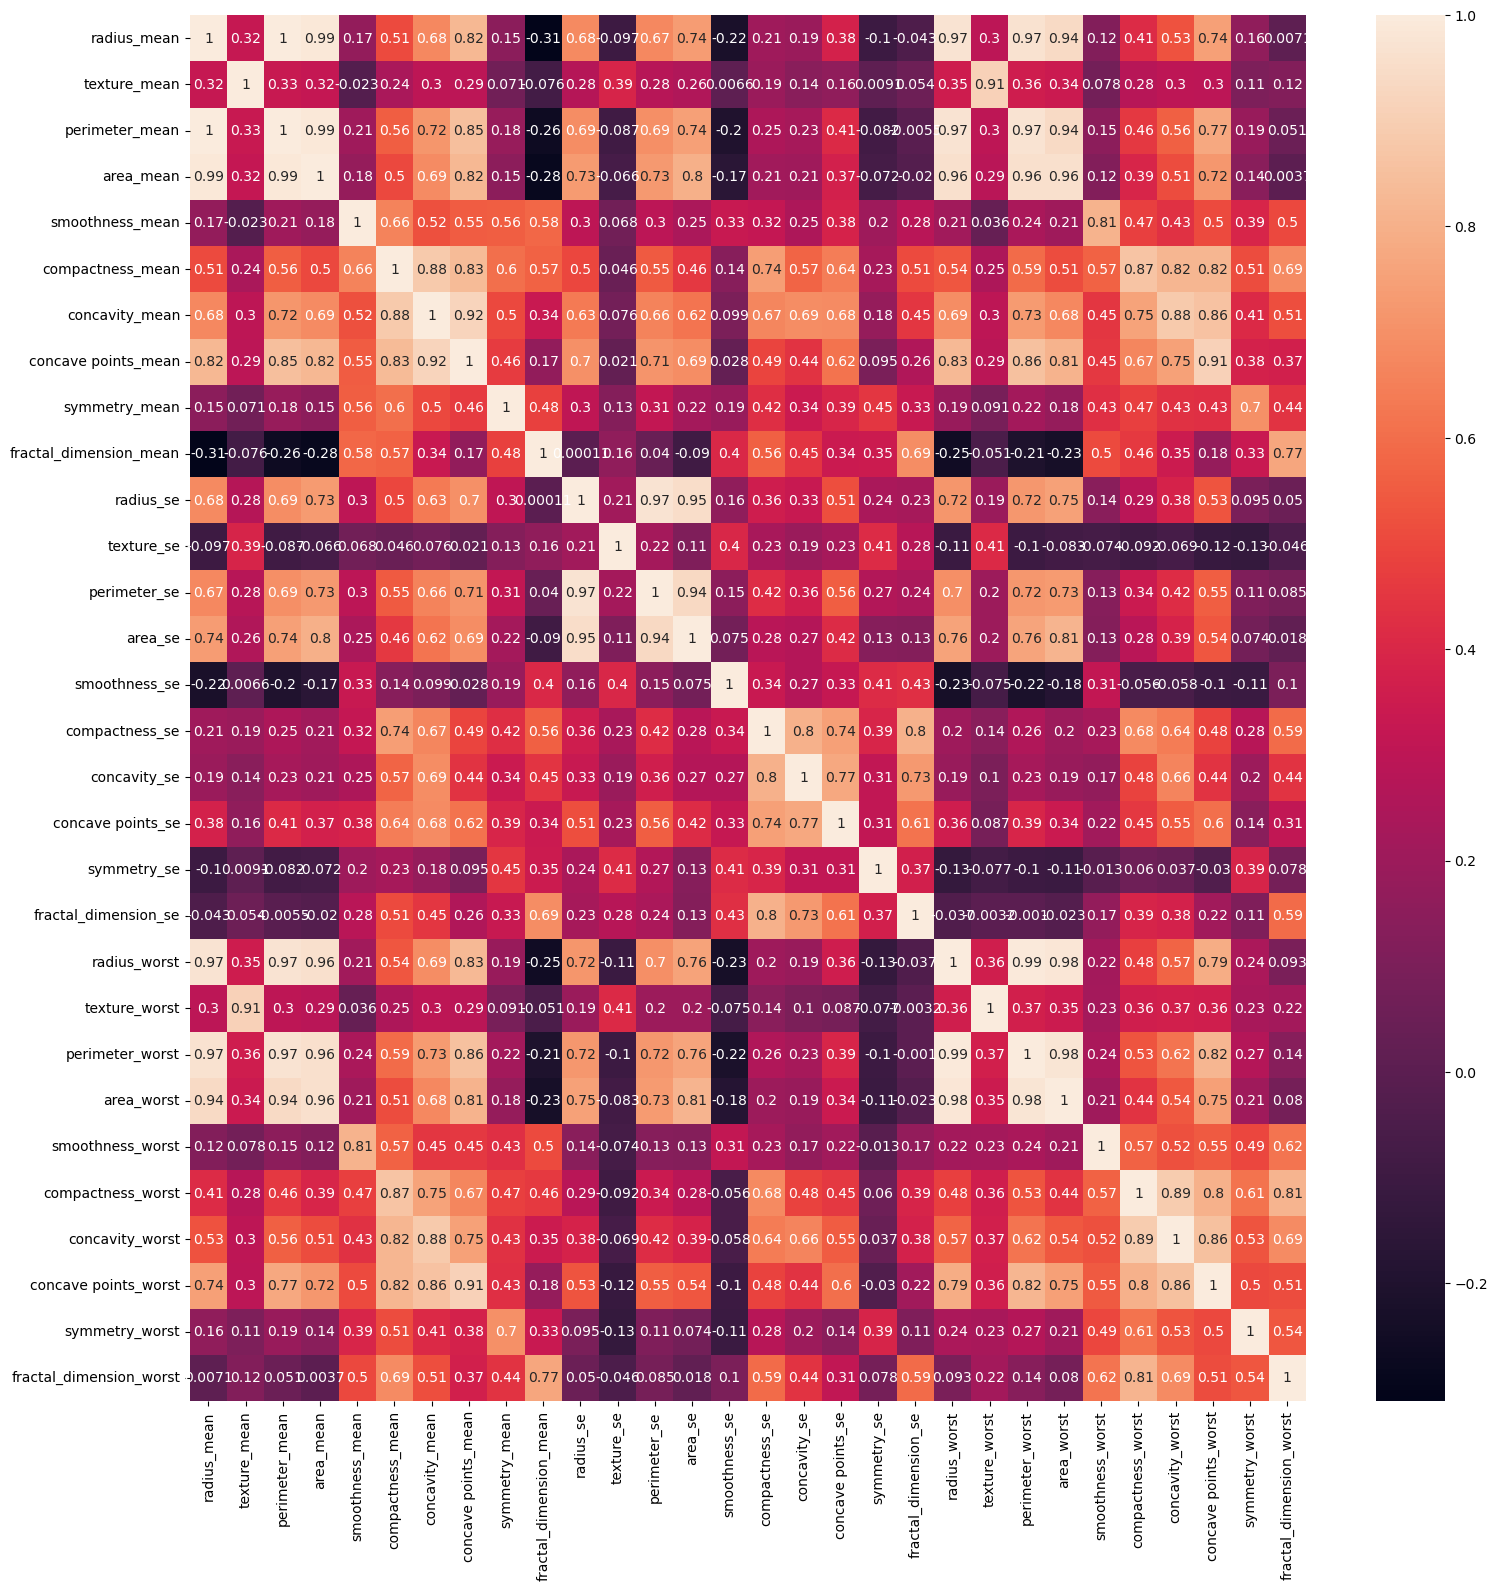

In [13]:
corrl =Breast_cancer.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corrl,annot=True)
plt.show()

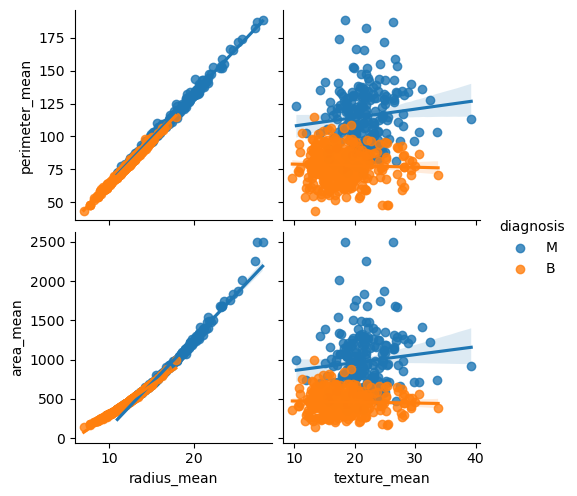

In [14]:
sns.pairplot(Breast_cancer, x_vars=["radius_mean", "texture_mean"], y_vars=["perimeter_mean", "area_mean"], hue="diagnosis", kind="reg")
plt.show()


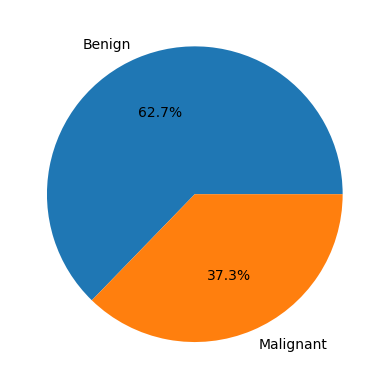

In [15]:
plt.pie(Breast_cancer['diagnosis'].value_counts(), labels = ['Benign', 'Malignant'],autopct='%1.1f%%')
plt.show()

* **So there are 62.7% Benign means condition that is non-cancerous and does not spread to other parts of the body.**
* **So there are 37.3% Malignant means condition that is cancerous and has the potential to spread to other parts of the body.**

# Classification

In [16]:
Breast_cancer.shape

(569, 31)

In [17]:
X = Breast_cancer.drop(["diagnosis"], axis=1)
y = Breast_cancer["diagnosis"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [20]:
X_test.shape,y_test.shape

((114, 30), (114,))

# FEATURE SELECTION TECHNIQUES

# 1) Select From Lasso regularization

In [34]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

# Creating the logistic regression model with Lasso regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

# Calculating evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_mat = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Printing the results
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_mat)


              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193
Precision: 0.975
Recall: 0.9069767441860465
Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [31]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [32]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
486    B
75     M
249    B
238    B
265    M
Name: diagnosis, Length: 114, dtype: object

# 2) select from Ridge regularization

In [35]:
from sklearn.datasets import make_classification

# Generating dataset
X, y = make_classification(n_features=5, n_classes=2)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a LogisticRegression object with Ridge regularization
clf = LogisticRegression(penalty='l2', solver='liblinear')

# Fiting the model on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Printing evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.85
Precision:  0.8888888888888888
Recall:  0.8
Confusion Matrix: 
 [[9 1]
 [2 8]]


# we select the lasso regularization model 

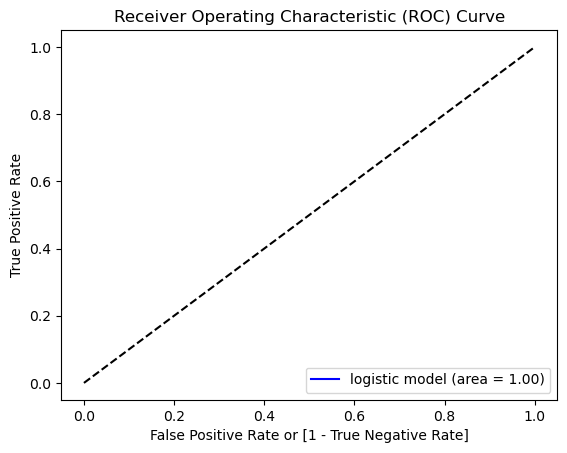

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# predict class probabilities on the test data
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label=1)

# calculate the area under the curve
auc = roc_auc_score(y_test, y_pred_probs)

# plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='logistic model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [28]:
auc

0.9977071732721913